In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the Census Data
from census import Census

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [49]:
marriage_data = ("/Users/demetriahorton/Downloads/Project1-Code-and-CSV/combined_df.csv")

# Read in the data.
marriage_status_df = pd.read_csv(marriage_data)
marriage_status_df

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty,No Education,High School Education,GED,Associates,...,poverty_family_married,Single Male,Single Female,poverty_female,poverty_male,poverty_family,state,Zipcode,Year,Poverty Rate
0,ZCTA5 00601,13092.0,17242.0,40.5,6999.0,10772.0,492.0,2868.0,160.0,888.0,...,1223.0,215.0,988.0,5905.0,4867.0,2426.0,72.0,601,2018,62.475351
1,ZCTA5 00602,16358.0,38442.0,42.3,9277.0,19611.0,901.0,5751.0,947.0,3387.0,...,2360.0,502.0,1665.0,10077.0,9534.0,4527.0,72.0,602,2018,51.014515
2,ZCTA5 00603,16603.0,48814.0,41.1,11307.0,24337.0,924.0,8745.0,996.0,2370.0,...,2393.0,697.0,3349.0,13467.0,10870.0,6439.0,72.0,603,2018,49.856599
3,ZCTA5 00606,12832.0,6437.0,43.3,5943.0,4163.0,185.0,1284.0,138.0,241.0,...,421.0,109.0,251.0,2110.0,2053.0,781.0,72.0,606,2018,64.672984
4,ZCTA5 00610,19309.0,27073.0,42.1,10220.0,11724.0,643.0,4945.0,624.0,2241.0,...,1307.0,278.0,1029.0,6074.0,5650.0,2614.0,72.0,610,2018,43.305138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166903,ZCTA5 99923,-666666666.0,25.0,-666666666.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99923,2022,0.000000
166904,ZCTA5 99925,80313.0,920.0,43.0,36414.0,143.0,0.0,191.0,63.0,53.0,...,4.0,1.0,15.0,56.0,87.0,20.0,NaN,99925,2022,15.543478
166905,ZCTA5 99926,78365.0,1465.0,37.9,29100.0,222.0,0.0,299.0,67.0,125.0,...,26.0,6.0,8.0,82.0,140.0,40.0,NaN,99926,2022,15.153584
166906,ZCTA5 99927,-666666666.0,14.0,-666666666.0,NaN,0.0,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99927,2022,0.000000


In [91]:
selected_columns = ['poverty_female', 'poverty_male', 'poverty_family', 'Year']

# Creating a new DataFrame with only the selected columns
selected_data = marriage_status_df[selected_columns]

selected_data = selected_data.dropna()

selected_data

,poverty_female,poverty_male,poverty_family,Year
0,5905.0,4867.0,2426.0,2018
1,10077.0,9534.0,4527.0,2018
2,13467.0,10870.0,6439.0,2018
3,2110.0,2053.0,781.0,2018
4,6074.0,5650.0,2614.0,2018
...,...,...,...,...
166903,0.0,0.0,0.0,2022
166904,56.0,87.0,20.0,2022
166905,82.0,140.0,40.0,2022
166906,0.0,0.0,0.0,2022


In [92]:
desired_years = range(2018, 2023)

for year in desired_years:
    average_female_poverty_for_year = selected_data[selected_data['Year'] == year]['poverty_female'].mean()
    print(f'Average Female Poverty for {year}: {average_female_poverty_for_year}')

Average Female Poverty for 2018: 765.5389149161251
Average Female Poverty for 2019: 736.5308876811595
Average Female Poverty for 2020: 709.7118961352656
Average Female Poverty for 2021: 689.7611180197786
Average Female Poverty for 2022: 685.8893527565583


In [93]:
desired_years = range(2018, 2023)

for year in desired_years:
    average_male_poverty_for_year = selected_data[selected_data['Year'] == year]['poverty_male'].mean()
    print(f'Average Male Poverty for {year}: {average_male_poverty_for_year}')

Average Male Poverty for 2018: 616.8580021157625
Average Male Poverty for 2019: 590.7286231884058
Average Male Poverty for 2020: 567.7542270531401
Average Male Poverty for 2021: 555.6291229940191
Average Male Poverty for 2022: 554.3881684135725


In [94]:
desired_years = range(2018, 2023)

for year in desired_years:
    average_family_poverty_for_year = selected_data[selected_data['Year'] == year]['poverty_family'].mean()
    print(f'Average Family Poverty for {year}: {average_family_poverty_for_year}')

Average Family Poverty for 2018: 249.85525162460328
Average Family Poverty for 2019: 237.54447463768116
Average Family Poverty for 2020: 228.49731280193237
Average Family Poverty for 2021: 221.80455379878012
Average Family Poverty for 2022: 220.88881980221473


In [95]:
column_averages = selected_data.mean()

row_averages = selected_data.mean(axis=1)

column_averages.head()


poverty_female     717.243862
poverty_male       576.890348
poverty_family     231.632984
Year              2020.012177
dtype: float64

In [96]:
row_averages.head()

0    3804.0
1    6539.0
2    8198.5
3    1740.5
4    4089.0
dtype: float64

In [97]:
avarages = {
    
    'poverty_female': [765.54, 736.53, 709.71, 689.76, 685.09],
    'poverty_male': [616.85, 590.72, 567.75, 555.62, 554.38],
    'poverty_family': [249.85, 237.54, 228.49, 221.80, 220.88]
}

# Add a 'year' column
years = [2018, 2019, 2020, 2021, 2022]
average_income = pd.DataFrame(avarages, index=years)

average_income.head()

,poverty_female,poverty_male,poverty_family
2018,765.54,616.85,249.85
2019,736.53,590.72,237.54
2020,709.71,567.75,228.49
2021,689.76,555.62,221.80
2022,685.09,554.38,220.88


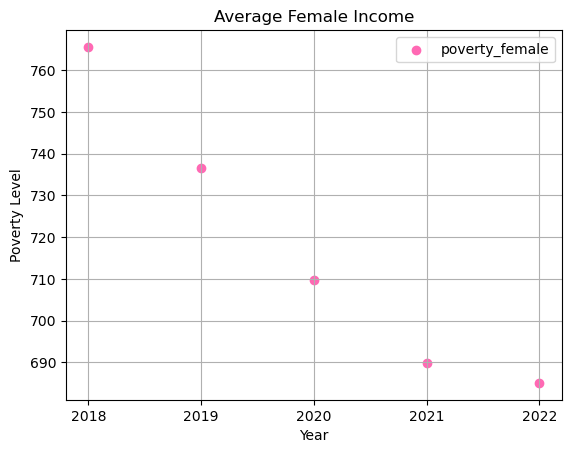

In [98]:

plt.scatter(average_income.index, average_income['poverty_female'], label='poverty_female', color="hotpink")


# Customize the plot
plt.title('Average Female Income')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(average_income.index)
plt.show()

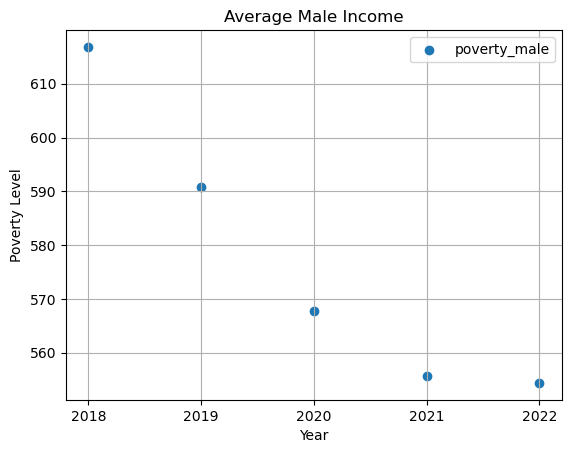

In [99]:
plt.scatter(average_income.index, average_income['poverty_male'], label='poverty_male')

# Customize the plot
plt.title('Average Male Income')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(average_income.index)
plt.show()

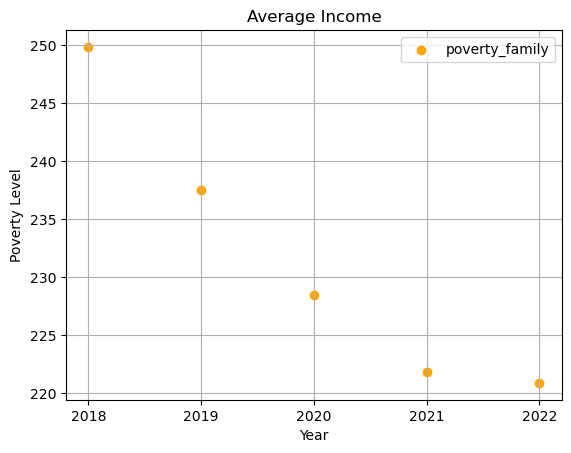

In [100]:
plt.scatter(average_income.index, average_income['poverty_family'], label='poverty_family', color="orange")

# Customize the plot
plt.title('Average Income')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(average_income.index)
plt.show()



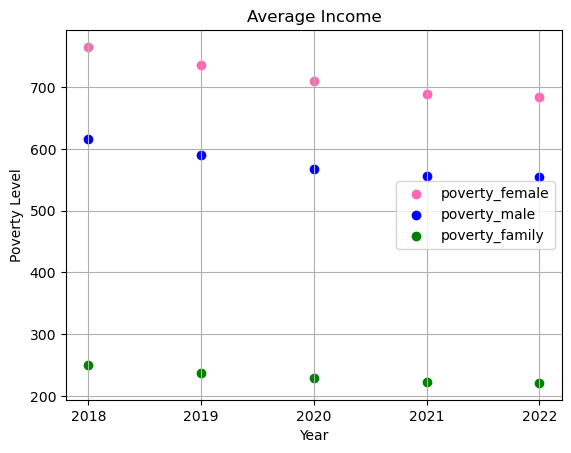

In [101]:
plt.scatter(average_income.index, average_income['poverty_female'], label='poverty_female', color="hotpink")
plt.scatter(average_income.index, average_income['poverty_male'], label='poverty_male', color="blue")
plt.scatter(average_income.index, average_income['poverty_family'], label='poverty_family', color="green")

# Customize the plot
plt.title('Average Income')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(average_income.index)
plt.show()



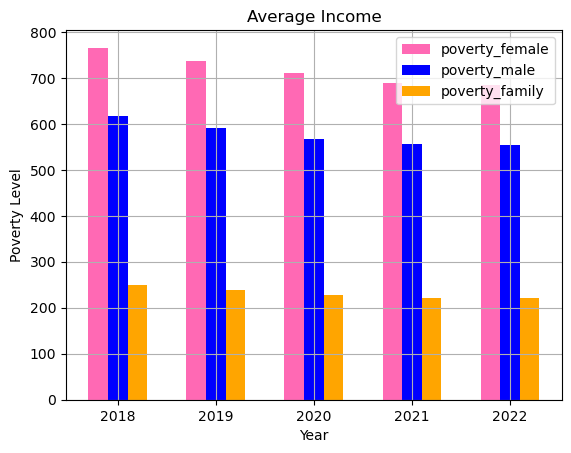

In [102]:


data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'poverty_female': [765.54, 736.53, 709.71, 689.76, 685.09],
    'poverty_male': [616.85, 590.72, 567.75, 555.62, 554.38],
    'poverty_family': [249.85, 237.54, 228.49, 221.80, 220.88]
}

average_income = pd.DataFrame(data)
average_income = average_income.set_index('Year')

# Bar chart
plt.bar(average_income.index - 0.2, average_income['poverty_female'], width=0.2, label='poverty_female', color="hotpink")
plt.bar(average_income.index, average_income['poverty_male'], width=0.2, label='poverty_male', color="blue")
plt.bar(average_income.index + 0.2, average_income['poverty_family'], width=0.2, label='poverty_family', color="orange")

# Customize the plot
plt.title('Average Income')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(average_income.index)
plt.show()

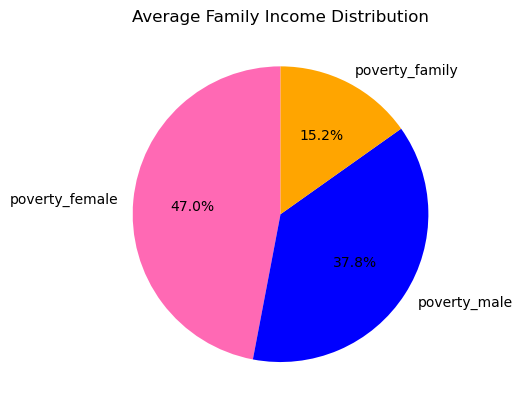

In [103]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'poverty_female': [765.54, 736.53, 709.71, 689.76, 685.09],
    'poverty_male': [616.85, 590.72, 567.75, 555.62, 554.38],
    'poverty_family': [249.85, 237.54, 228.49, 221.80, 220.88]
}

average_income = pd.DataFrame(data)
average_income = average_income.set_index('Year')

average_income = pd.DataFrame(data)
average_income = average_income.set_index('Year')

# Calculate the sum for each column
sum_poverty_female = average_income['poverty_female'].sum()
sum_poverty_male = average_income['poverty_male'].sum()
sum_poverty_family = average_income['poverty_family'].sum()

# Pie chart
labels = ['poverty_female', 'poverty_male', 'poverty_family']
sizes = [sum_poverty_female, sum_poverty_male, sum_poverty_family]
colors = ['hotpink', 'blue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title('Average Family Income Distribution')

# Show the plot
plt.show()

R-value: -0.973525877386808


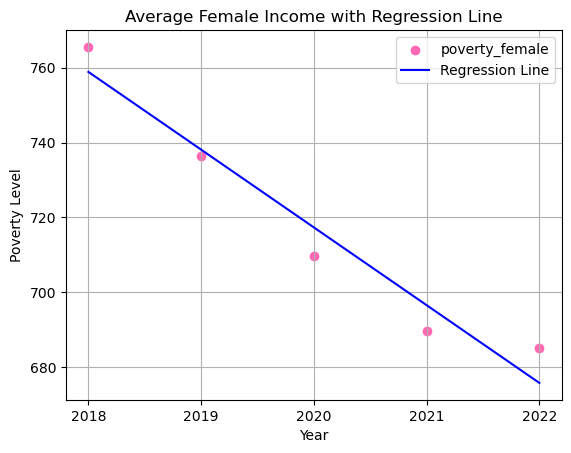

In [104]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'poverty_female': [765.54, 736.53, 709.71, 689.76, 685.09],
}

average_income = pd.DataFrame(data)
average_income = average_income.set_index('Year')

# Scatter plot
plt.scatter(average_income.index, average_income['poverty_female'], label='poverty_female', color='hotpink')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_income.index, average_income['poverty_female'])

# Plot the regression line
regression_line = slope * average_income.index + intercept
plt.plot(average_income.index, regression_line, label='Regression Line', color='blue')

# Customize the plot
plt.title('Average Female Income with Regression Line')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
print(f'R-value: {r_value}')


plt.xticks(average_income.index)
plt.show()

R-value: -0.9512429717920781


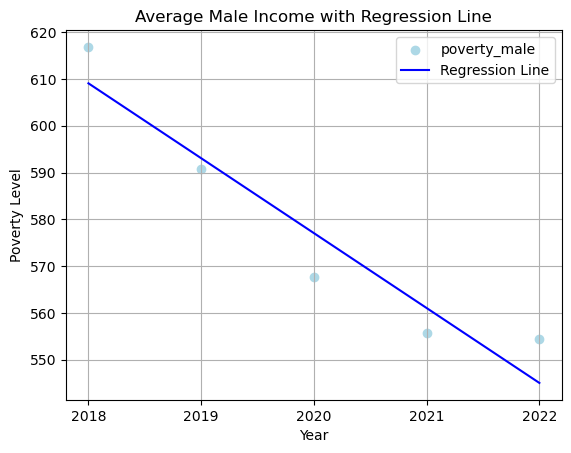

In [105]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'poverty_male': [616.85, 590.72, 567.75, 555.62, 554.38],
}

average_income_male = pd.DataFrame(data)
average_income_male = average_income_male.set_index('Year')

# Scatter plot
plt.scatter(average_income_male.index, average_income_male['poverty_male'], label='poverty_male', color='lightblue')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_income_male.index, average_income_male['poverty_male'])

# Plot the regression line
regression_line = slope * average_income_male.index + intercept
plt.plot(average_income_male.index, regression_line, label='Regression Line', color='blue')

# Customize the plot
plt.title('Average Male Income with Regression Line')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
print(f'R-value: {r_value}')

plt.xticks(average_income_male.index)
plt.show()

R-value: -0.9601160330443282


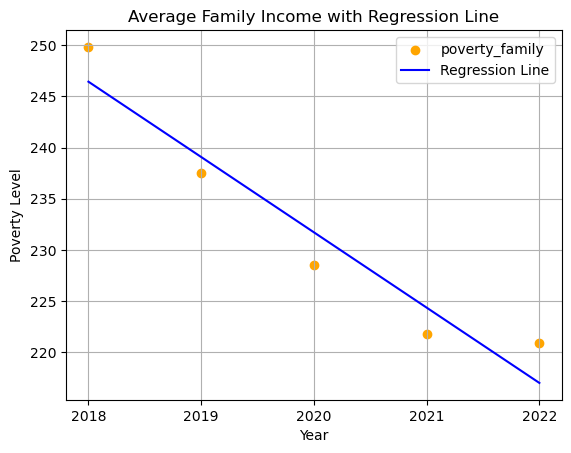

In [106]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'poverty_family': [249.85, 237.54, 228.49, 221.80, 220.88]
}

average_income_family = pd.DataFrame(data)
average_income_family = average_income_family.set_index('Year')

# Scatter plot
plt.scatter(average_income_family.index, average_income_family['poverty_family'], label='poverty_family', color='orange')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_income_family.index, average_income_family['poverty_family'])

# Plot the regression line
regression_line = slope * average_income_family.index + intercept
plt.plot(average_income_family.index, regression_line, label='Regression Line', color='blue')

# Customize the plot
plt.title('Average Family Income with Regression Line')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.legend()
plt.grid(True)

# Show the plot
print(f'R-value: {r_value}')

plt.xticks(average_income_family.index)
plt.show()
